In [2]:
import pandas as pd
import numpy as np 

In [3]:
df=pd.read_csv('data/50_Startups.csv')

* R&D Spend — расходы на исследования.
* Administration — административные расходы.
* Marketing Spend — расходы на маркетинг.
* State — штат.
* Profit — прибыль (целевой признак).

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
X=df.drop(['Profit', 'State'], axis=1)

In [6]:
y=df['Profit']

In [7]:
ones = np.ones(X.shape[0])

In [8]:
X=np.column_stack([ones, X])

In [9]:
Q = np.linalg.inv(X.T @ X)

In [10]:
w = Q @ X.T @ y
w

array([ 5.01221930e+04,  8.05715050e-01, -2.68159684e-02,  2.72280648e-02])

In [11]:
data=pd.read_csv('data/insurance.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
# необходимые библиотеки
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
from sklearn import preprocessing #предобработка
from sklearn.model_selection import train_test_split #разделение выборки

Итак, набор данных содержит следующие столбцы:

* age — возраст основного бенефициара;
* sex — пол страхового подрядчика;
* bmi — индекс массы тела (кг/м2), в идеале — от 18.5 до 24.9;
* children — количество детей, охваченных медицинской страховкой;
* smoker — является ли человек курящим;
* region — жилой район США (северо-восток, юго-восток, северо-запад, юго-запад);
* charges (целевой признак) — индивидуальные медицинские расходы, оплачиваемые медицинской страховкой.

In [13]:
# размер таблицы 
print (data.shape)

(1338, 7)


In [14]:
# пропуски 
display (data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [15]:
# типы данных
display (data.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

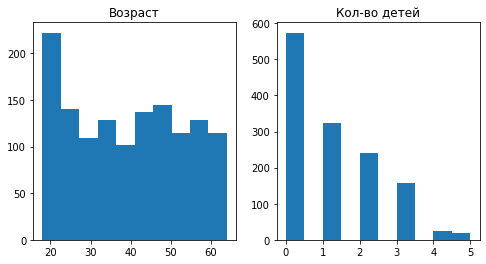

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ax[0].hist(data['age'])
ax[0].set_title("Возраст");

ax[1].hist(data['children'])
ax[1].set_title("Кол-во детей");

Кодировку будем совершать по следующему принципу:

* smoker — переведём в бинарные значения (0 — некурящий, 1 — курящий);
* sex — аналогично (0 — female, 1 — male);
* region — используем OneHot-кодирование (воспользуемся функцией get_dummies).

In [17]:
data['smoker']=data['smoker'].apply(lambda x: 0 if x =='no' else 1)
data['sex']=data['sex'].apply(lambda x: 0 if x == 'female' else 1)
data=pd.get_dummies(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northeast  1338 non-null   uint8  
 7   region_northwest  1338 non-null   uint8  
 8   region_southeast  1338 non-null   uint8  
 9   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 68.1 KB


In [18]:
# Выделим факторы и целевой признак в отдельные таблицы:
features=data.drop('charges', axis=1).columns
X, y = data[features], data['charges']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X_test.shape

(268, 9)

In [21]:
lr_model=linear_model.LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [22]:
round(lr_model.intercept_, 2)

-12390.8

In [23]:
y_predict_train=lr_model.predict(X_train)
y_predict_test=lr_model.predict(X_test)

In [24]:
R2_train=metrics.r2_score(y_train, y_predict_train)
R2_test=metrics.r2_score(y_test, y_predict_test)

In [25]:
round(R2_train, 3)

0.742

In [26]:
round(R2_test, 3)

0.784

In [27]:
mae_train=metrics.mean_absolute_error(y_train, y_predict_train)
round(mae_train)

4208

In [28]:
mae_test=metrics.mean_absolute_error(y_test, y_predict_test)
round(mae_test)

4181

In [29]:
mape_train=metrics.mean_absolute_percentage_error(y_train, y_predict_train)*100
round(mape_train)

42

In [30]:
mape_test=metrics.mean_absolute_percentage_error(y_test, y_predict_test)*100
round(mape_test)

47

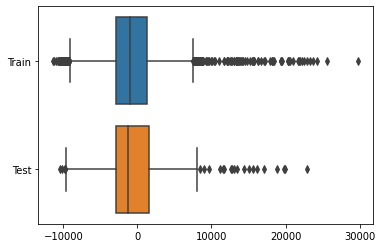

In [31]:
# визуализация ошибок модели
y_error_train=y_train-y_predict_train
y_error_test=y_test-y_predict_test
errors_df=pd.DataFrame({'Train': y_error_train,
                       'Test': y_error_test})
sns.boxplot(data=errors_df, orient='h');

In [32]:
scaler=preprocessing.MinMaxScaler()

In [33]:
scaler.fit(X_train)

MinMaxScaler()

In [34]:
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [36]:
poly=preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train_scaled)
X_train_scaled_poly=poly.transform(X_train_scaled)
X_test_scaled_poly=poly.transform(X_test_scaled)

In [37]:
X_train_scaled_poly.shape

(1070, 54)

In [38]:
lr_model.fit(X_train_scaled_poly, y_train)

LinearRegression()

In [39]:
y_test_scaled_poly=lr_model.predict(X_test_scaled_poly)

In [41]:
round(metrics.r2_score(y_test, y_test_scaled_poly), 3)

0.866

In [44]:
lr_model.coef_

array([-2.99905185e+16,  1.39573039e+17,  1.83347682e+16,  3.08125002e+15,
       -1.15660733e+16, -7.36012141e+16, -2.00744596e+17, -6.12984196e+16,
       -4.35188406e+16,  8.59600000e+03,  8.35000000e+02,  1.31000000e+03,
       -1.59200000e+03,  1.66000000e+02,  2.99905185e+16,  2.99905185e+16,
        2.99905185e+16,  2.99905185e+16, -1.25520995e+17,  7.72000000e+02,
       -1.22225000e+03,  2.55500000e+02, -1.40520436e+16, -1.40520436e+16,
       -1.40520436e+16, -1.40520436e+16, -9.82462500e+03,  1.52990625e+03,
        5.48309062e+04, -1.83347682e+16, -1.83347682e+16, -1.83347682e+16,
       -1.83347682e+16, -2.06800000e+03, -2.19912500e+03, -3.08125002e+15,
       -3.08125002e+15, -3.08125002e+15, -3.08125002e+15, -1.54924477e+16,
        2.70585211e+16,  2.70585211e+16,  2.70585211e+16,  2.70585211e+16,
       -1.31012929e+16,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.14042089e+17,  0.00000000e+00,  0.00000000e+00, -2.54040874e+16,
        0.00000000e+00, -

In [45]:
lasso_lr_poly=linear_model.Lasso(max_iter=2000)
lasso_lr_poly.fit(X_train_scaled_poly, y_train)
y_train_lasso=lasso_lr_poly.predict(X_train_scaled_poly)
y_test_lasso=lasso_lr_poly.predict(X_test_scaled_poly)

In [48]:
r2_lasso=metrics.r2_score(y_test, y_test_lasso)
round(r2_lasso, 3)

0.867

In [49]:
mae_test_lasso=metrics.mean_absolute_error(y_test, y_test_lasso)
round(mae_test_lasso)

2719

In [50]:
mape_test_lasso=metrics.mean_absolute_percentage_error(y_test, y_test_lasso)*100
round(mape_test_lasso)

30

In [52]:
ridge_lr_poly=linear_model.Ridge()
ridge_lr_poly.fit(X_train_scaled_poly, y_train)


Ridge()

In [53]:
y_predict_test_test_ridge=ridge_lr_poly.predict(X_test_scaled_poly)

In [54]:
round(metrics.r2_score(y_test, y_predict_test_test_ridge), 3)

0.863

In [55]:
round(metrics.mean_absolute_error(y_test, y_predict_test_test_ridge))

2861

In [56]:
round(metrics.mean_absolute_percentage_error(y_test, y_predict_test_test_ridge)*100)

31